To open notebook in Colab please click below:
<a href="https://colab.research.google.com/github/bwolfson2/dsclass2022/blob/main/Homeworks/HW4.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>'

<span style="font-family: Palatino; font-size: 40px; color: purple">
             Homework - build a walk-forward testing harness 
</span>


<span style="color:purple; font-size:25px">
    <b>Background</b>
</span>

### <span style="color:purple"> Business context </span>

**The senior management of the convenience store chain found your initial analysis useful.**

**The CFO is still skeptical, though.  Before she will agree to use the models you have built, she wants to be comfortable that the analysis will hold-up in the future.  She has challenged you to convince her.**


### <span style="color:purple"> Mandate </span>

In order to demonstrate the robustness of your models (or highlight the lack thereof) you will need to build a walk-forward testing harness:

```python

def walk_forward_harness(df, preprocessor, estimator, predictor, 
                         start, date_col = 'Date', step_size = 1):     
    # your code here
    return(pred)
    
def preprocessor(df, preproc_params = {}, new = True):
    # your code here
    return(df)
    
def estimator(df, fitting_algo, est_params = {}):
    # your code here    
    return(model_object)
    
def predictor(new_df, model):
    # your code here
    return(predictions)


```
where
    

| argument | Description| Returns |
| :--   | -:-  | :-- |
|`df, new_df`|  a Pandas `DataFrame` containing the data to be modeled       | None
|`start`           |  a date index value after which to start the walk-forward test| None
|`preprocessor`    |  a function that takes as input `df`: a Pandas `DataFrame` of raw data to be modeled, `preproc_params`: a list of preprocessing parameters if needed, and `new`: a flag indicating whether new parameters should be estimated | a list containing a Pandas DataFrame that contains the preprocessed data to be modeled, a list that is either empty or that contains any parameters estimated for preprocessing
|`estimator`       |  a function that takes as input `df`: a Pandas `DataFrame` of data to be modeled, `fitting_algo`: a function that estimates the model, and `est_params`: any other arguments required. | a model object that can be read by `predictor`
|`predictor`       |  a function that takes as input `new_df`: a Pandas `DataFrame` of raw data for which predictions should be generated, a `mod`: a model object estimated by `estimator`, `preprocessor`: see above, and any other arguments required         | a Pandas DataFrame containing one row for each row in the data frame

### <span style="color:purple"> Requirements</span>

* Please use `statsmodels.api` for your analysis.  
* Please use the data prior to 2014-07-01 as the initial training set for the first walkforward prediction.
* Please assume that for any `Store` on any `Date`, you will always _know in advance_ (i.e., before the beginning of each day) the values of:
  * `DayOfWeek`
  * `Open`
  * `Promo`
  * `StateHoliday` and 
  * `SchoolHoliday`
  * All of the information that was provided in the `Store.csv` file

### <span style="color:purple"> Data and models </span>

Please use the code from the last homework for preprocessing the data and estimating the models you will analyze.  You do not need to refine the models you have already developed any further for this homework.

### <span style="color:purple"> Helper functions </span>

In [ ]:
def progress_bar(k, n, incr_txt="Step", bar_len = 10):
   
    bar_char  = u'\u25A5'
    line_char = u'\u21E2' # u'\u2192'  u'\u23AF' u'\u25AD'
    
    places   = int(np.ceil(n/bar_len))
    pct      = k/n
    n_str    = "{:,.0f}".format(n)        
    k_str    = "{:,.0f}".format(k)
    pct_str  = "{:,.0f}%".format(k/n * 100)
    # d_format = "%" + str(places) + "d"
    
    if k == n-1:
        n_bars = bar_len
        n_spaces = 0
        text_txt = "Completed " + n_str + " " + incr_txt + "s."
    else:
        n_bars   = int(np.floor(pct * bar_len))
        n_spaces = bar_len - n_bars
        text_txt = " " + pct_str +  " (" + incr_txt + " " + k_str + " of  " + n_str + ")."

    bar_txt  = "[" + "".ljust(n_bars,bar_char) + "".rjust(n_spaces,line_char) + "]  " 

    clear_output()
    display(bar_txt + text_txt)

# <span style="color:purple"> The following is basic processing code </span>

In [ ]:
import pandas as pd
from IPython.display import HTML 

path = '/Users/rogermstein/Dropbox/Current-Work/_WORK/__Teaching/000-2022-Spring-NYU-Data-Science-For-Business/Material/Data/retail_sales/'

fn           = 'retail_sales.csv'
full_fn      = path+'/'+fn
working_df   = pd.read_csv(full_fn)

working_df.dropna(axis='index', subset=['Sales'],inplace=True)

working_df['Date']         = pd.to_datetime(working_df['Date'], format='%Y-%m-%d')
working_df['StateHoliday'] = working_df['StateHoliday'].astype('string')

working_df = pd.get_dummies(working_df, columns=['DayOfWeek'], drop_first=True, dummy_na=False)
working_df = pd.get_dummies(working_df, columns=['StateHoliday'], drop_first=True, dummy_na=False)

# Q1: In your own words, please describe why walk-forward analysis is useful? What is a scenario when you would use it? When would it be wise to steer clear from using walkforward analysis? WORTH 2 POINTS

In [ ]:
XXX # your written answer here

# <span style="color:purple"> Q2:  Please use your code from the previous homework to write the function `preprocessor`. </span>

In [ ]:
import numpy as np
import copy as cp

def preprocessor(df, preproc_params = dict(), new = True):
 
    working_df            = XXX   # eliminate observations for closed stores
    working_df['lnSales'] = np.log(XXX+1)  # add 1 to account for for zero sales days

    if new is XXX: 
        mu    = working_df.lnSales.mean()     # calculate mean for z-scores
        sigma = working_df.lnSales.std()      # calculate sd for z-scores
    else:
        mu    = XXX #get mu from preprocess dict
        sigma = XXX #get sigma from preprocess dict
    
    x     = np.array(working_df.lnSales)  # convert to np.array to permit vectorization
    z     = ### take z score of x

    working_df['zSales'] = z
    working_df['lowSalesFlag'] = np.where(z < -1, 1,0)
    df = cp.copy(working_df)
    
    ### set params
    params          = preproc_params
    params['mu']    = mu
    params['sigma'] = sigma
    
    return([working_df, params])

# <span style="color:purple"> Q3: Please test your code on the training sample to confirm that it produces the same results as in the previous homework </span>

In [ ]:
df_train_raw   = working_df.loc[working_df['Date'] < '2014-07-01']
df_train, pars = preprocessor(XXX, preproc_params = XXX, new = XXX) ## dataframe, emtpy dictionary, is it new?
print(pars)
df_train.describe()

{'mu': 8.737838891850588, 'sigma': 0.4345292537249591}


,Store,Sales,Customers,Open,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_a,StateHoliday_b,StateHoliday_c,lnSales,zSales,lowSalesFlag
count,503607.000000,503607.000000,503607.000000,503607.0,503607.000000,503607.000000,503607.000000,503607.000000,503607.000000,503607.000000,503607.000000,503607.000000,503607.000000,503607.000000,503607.000000,503607.000000,5.036070e+05,503607.000000
mean,557.989508,6834.413912,758.106917,1.0,0.431420,0.174366,0.170083,0.165603,0.158123,0.166807,0.172285,0.004134,0.000898,0.000191,0.000071,8.737839,-2.466647e-13,0.143282
std,321.639474,3093.018437,400.770897,0.0,0.495275,0.379424,0.375706,0.371725,0.364857,0.372804,0.377628,0.064165,0.029945,0.013805,0.008455,0.434529,1.000000e+00,0.350361
min,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.010875e+01,0.000000
25%,280.000000,4752.000000,513.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.466531,-6.243713e-01,0.000000
50%,558.000000,6239.000000,671.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.738735,2.063312e-03,0.000000
75%,836.000000,8214.000000,889.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.013717,6.348897e-01,0.000000
max,1115.000000,38037.000000,7388.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.546341,4.161980e+00,1.000000


# <span style="color:purple"> Q4: Please use your code from the previous homework to write the function `estimator` _using the discrete choice models only_. </span> 

The easiest way to do this is to create a harness function for your estimation, e.g.,
```python
def my_estimation_fn(df):
    import import statsmodels.formula.api as smf
    
    f = 'y ~ x1 + x2 + x3
    model_ols = smf.ols(f, data=df).fit(disp=0)
    return(model_ols)
```

Of course there are more elegant approaches to acomplishing this that would be more extensible, and you can experiment with these when you have the time.

In [ ]:
import statsmodels.formula.api as smf

def my_estimation_ols_fn(df):
    f = 'lnSales ~ XXX' #formula
    model = smf.ols(f, data =  XXX).fit() #dataframe 
    return(model)

In [ ]:
import statsmodels.formula.api as smf

def my_estimation_logit_fn(df):
    XXX #same function as above but with logit

# <span style="color:purple"> Q5: Please test your `estimator` function using the same training data you used in the previous homework and confirm that the results match your previous results. </span>

In [ ]:
model_logit = my_estimation_logit_fn(XXX) #training data
model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           lowSalesFlag   No. Observations:               503607
Model:                          Logit   Df Residuals:                   503595
Method:                           MLE   Df Model:                           11
Date:                Thu, 30 Dec 2021   Pseudo R-squ.:                  0.1072
Time:                        19:36:40   Log-Likelihood:            -1.8475e+05
converged:                       True   LL-Null:                   -2.0692e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.5897      0.013   -122.632      0.000      -1.615      -1.564
Promo             -1.8862      0.013   -148.303      0.000      -1.911      -1.861
SchoolHoliday     -0.0679      0.012     -5.669      0.000      -0.091      -0.044
DayOfWeek_2        0.4187      0.016     25.775      0.000       0.387       0.451
DayOfWeek_3        0.3871      0.016     23.619      0.000       0.355       0.419
DayOfWeek_4        0.3511      0.017     21.070      0.000       0.318       0.384
DayOfWeek_5       -0.1246      0.018     -7.056      0.000      -0.159      -0.090
DayOfWeek_6        0.6221      0.015     41.480      0.000       0.593       0.651
DayOfWeek_7        0.7510      0.049     15.180      0.000       0.654       0.848
StateHoliday_a     0.6011      0.127      4.745      0.000       0.353       0.849
StateHoliday_b     1.1396      0.243      4.693      0.000       0.664       1.616
StateHoliday_c    -0.7901      0.530     -1.489      0.136      -1.830       0.250
==================================================================================
"""

 
#  <span style="color:purple"> Q6:  Please use your code from the previous homework to write the function `predictor`.</span>

In [ ]:
def predictor(new_df, model):
    pred = model.predict(XXX) #dataframe
    return(pred)

# <span style="color:purple"> Q7: Please test your `predictor` function using the same training data you used in the previous homework and confirm that the results match your previous results. </span>

In [ ]:
from sklearn import metrics

df_train     = working_df.loc[working_df['Date'] < '2014-07-01']
new_df, pars = preprocessor(df_train, preproc_params = {}, new = True)
p_baseline   = np.mean(new_df['lowSalesFlag'])

pred         = XXX #predictor function along with model

predictor_cols = model_logit.params.index.values.tolist()
target_col     = 'lowSalesFlag'
act            = new_df[target_col]

coef           = model_logit.params.values.tolist()
pred_bin             = np.where(pred > p_baseline, True, False)    # sk.metrics needs discrete valued data 
pred_df = pd.DataFrame({"actual":act, "predicted":pred_bin})

model_logit_accuracy = metrics.accuracy_score(pred_bin, act)   

print("Accuracy (sklearn): ",np.round(model_logit_accuracy,2))
print()

Accuracy (sklearn):  0.54



# <span style="color:purple"> Q9: Please write your `walk_forward_harness` function. (THIS QUESTION IS WORTH 3 POINTS)
For credit, please use the python `pipe` package to implement this functionality.  </span>

In [ ]:
# from pipe import Pipe, dedup, groupby, where, select, sort, traverse
from datetime import date as d
from IPython.display import display, clear_output
import copy as cp

import statsmodels.formula.api as smf
from loguru import logger 
import snoop

# @snoop(watch=('pred_df', 'results_set'))
def walk_forward_harness(df, preprocessor, estimation_algo, predictor, 
                         start = 1, step_size = 1,
                         actual_col = "Actual", date_col = 'Date', id_col = None,  
                         preproc_params = {}):
    
    if id_col is None:
        ID = DataFrame(data={'ID': range(len(date))})
    else:
        ID = df[id_col]
        
    date = df[date_col]
        
    idx_raw     = set(date)
    idx_unique  = list(idx_raw)
    idx         = sorted(idx_unique)
    n           = len(idx)
    
    start_date  = d.fromisoformat(start)
    history_idx = [d for d in idx if d < start_date]
    n_history   = len(history_idx)
    
    steps       = n - n_history - step_size
    
    if steps < 1:
        print("Insufficient data after cutoff to perform walk forward.")
        return(None)
    else:
        initialize_result_set = True
        results_set = None
        
        for i in range(steps):
            progress_bar(i, steps, incr_txt = "WF step", bar_len = 20)
            
            cutoff        = n_history + i
            wf_next_step  = idx[cutoff + step_size] 
            
            train_filt    = XXX # boolean filter for the training data for this run
            test_filt     = XXX # boolean filter for the test data for this run
            
            train_df      = df.loc[XXX, :]  # select using train_filt
            test_df       = df.loc[XXX, :]  # select using test_filt

            new_train_df, pars  = XXX #invoke preprocessor with correct arg 
            model         = XXX #fit model using estimation algorithms
            
            new_test_df, pars    = XXX ### preprocess test_df
            pred            = XXX ### use predictor to predict test df
            actual          = cp.copy(new_test_df[actual_col])
            pred_dates      = cp.copy(new_test_df[date_col])
            ID_range        = cp.copy(ID.loc[test_filt])
            pred_df         = pd.DataFrame({date_col: pred_dates, 'predicted': pred, 'actual': actual, 'ID' : ID_range})
          
            if initialize_result_set == True:
                results_set = [cp.deepcopy(pred_df)]
                initialize_result_set = False
            else:
                results_set.append(pred_df)

    results_set = pd.concat(results_set, ignore_index=True)
    results_set = results_set.dropna()
    return(results_set)

# <span style="color:purple"> Q8: Please test your `walk_forward_harness` function</span>

In [ ]:
results_set = walk_forward_harness(XXXX, XXXX, my_estimation_logit_fn, predictor, 
                                   start='2015-06-01', step_size = 1,
                                   actual_col = 'lowSalesFlag', date_col = 'Date', id_col = 'Store',
                                   preproc_params = {}) #model and preprocessor 

'[▥▥▥▥▥▥▥▥▥▥▥▥▥▥▥▥▥▥▥▥]  Completed 60 WF steps.'

# <span style="color:purple"> Q9: Please plot the following ROC curves: </span>

## <span style="color:purple"> ROC curve and AUC for __all__ predictions </span> 

In [ ]:
#helper func
def plot_roc(fpr,tpr,roc_auc):
  plt.figure()
  lw = 2
  plt.plot(
      fpr,
      tpr,
      color="darkblue",
      lw=lw,
      label="ROC curve (area = %0.2f)" % roc_auc,
  )
  plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver operating characteristic for predictions on Wednesday")
  plt.legend(loc="lower right")
  plt.show()

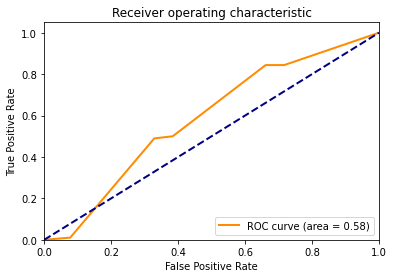

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

dep_var_name = model_logit.model.endog_names

pred              = results_set[XXX] #column to use for predicted
act               = results_set[XXX] #column to use for actual

fpr, tpr, _  = ### use the roc_curve function
roc_auc           = ### use the auc function

plot_roc(fpr,tpr,roc_auc)

## <span style="color:purple"> ROC curve and AUC for Wednesday predictions </span> 
You can use the Pandas function pandas.dt.dayofweek to pick the day.  Wendesday in Pandas is 2.  

See documentation  (https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.dayofweek.html)

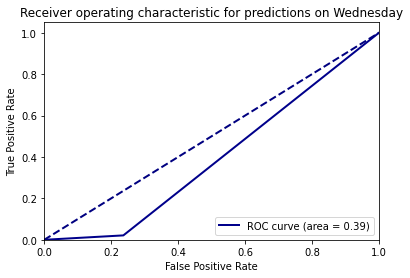

In [ ]:
WED = 2
dep_var_name = model_logit.model.endog_names

pred              = results_set[XXX] #colum to use
act               = results_set[XXX] #colum to use

## isolate wedneday if needed
filt = XXX ## boolean filter to select Wednesdaya

#the following results should only be for Wednesday
fpr, tpr, thresh  = ### use the roc_curve function MAKE SURE TO SELECT WENDESDAY as the date
roc_auc           = ### use the auc function MAKE SURE TO SELECT WENDESDAY as the date

